# **Nicholas Saunders**
**Astronomy 425**  
**Homework 4, Part 1**

**Problem 1**  
**(a)**

First, I'll define the given redshifts for the two galaxies, and the equation for redshift as a function of $\lambda_o$ and $\lambda_e$:

Galaxy 1: z = 0.5  
Galaxy 2: z = 1.6

$z = \frac{\lambda_o-\lambda_e}{\lambda_e} = \frac{\lambda_o}{\lambda_e} + 1 \rightarrow \lambda_o=(1+z)\lambda_e,\quad z_1 = \frac{\lambda_{o,1}-\lambda_{e,1}}{\lambda_{e,1}},\quad z_2 = \frac{\lambda_{o,2}-\lambda_{e,2}}{\lambda_{e,2}}$

The value for $\lambda_o$ for galaxy 2 as measured in galaxy 1 ($\lambda_{o,1,2}$) will be equal to $\lambda_{e,1}$ because they are in the same location:

$\lambda_{o,1,2}=\lambda_{e,1}$

Now, taking the emitted $\lambda$ of galaxy 2, $\lambda_{e,2}$, and using the values for $z_1$ and $z_2$ given above, we can solve for $z_{1,2}$, which will give the redshift of galaxy 2 observed at galaxy 1:

$z_{1,2} = \frac{\lambda_{o,1,2}-\lambda_{e,2}}{\lambda_{e,2}}=\frac{1+z_2}{1+z_1}-1$

Solving for the redshift of galaxy 2 as observed by galaxy 1 yields

$z_{1,2} = \frac{1+1.6}{1+0.5}-1 = \boxed{0.733}$.

**(b)**  
Angular diameter distance is given by the relation

$d_A=\frac{\mathscr{l}}{\delta\theta}$.

Starting from the Robertson-Walker metric and assuming $d\phi=0$,

$ds = a(t_e)S_\kappa(r)d\theta \rightarrow \mathscr{l}=\int ds = a(t_e)S_\kappa(r)\theta$

$\mathscr{l}=\frac{S_\kappa(r)}{1+z}\theta$

$\rightarrow d_A = \frac{S_\kappa(r)}{1+z}=\frac{d_L}{(1+z)^2}$.

For a flat universe,

$d_A = \frac{d_p(t_0)}{1+z}=d_p(t_e)$

and assuming matter only ($\Omega_m=1$),

$d_A=d_p(t_e)=\frac{2c}{H_0(1+z)}\left[1-\frac{1}{\sqrt{1+z}}\right]$.

Angular diameter distance to galaxy 1 (z=0.5): 1048.59 Mpc
Angular diameter distance to galaxy 2 (z=1.6): 1252.17 Mpc
Angular diameter distance from galaxy 1 to galaxy 2 (z=0.733): 1188.88 Mpc


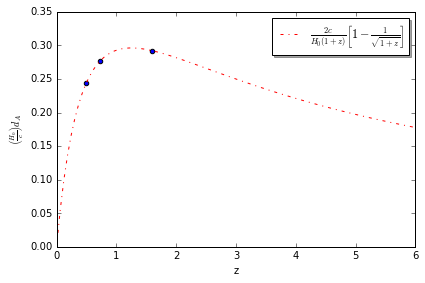

In [6]:
import numpy as np
import matplotlib.pyplot as pl
%matplotlib inline

z1 = 0.5
z2 = 1.6
z12 = 0.733
H0 = 70 / 3.09e19 # hubble constant in s^-1
c = 3e8  # speed of light in m/s

# returns angular diameter distance in meters
def d_A(z):
    return ((2 * c) / (H0 * (1 + z))) * (1 - 1 / np.sqrt(1 + z))

d1 = d_A(z1)
d2 = d_A(z2)
d12 = d_A(z12)

print("Angular diameter distance to galaxy 1 (z=0.5): %.2f Mpc" % (d1 / 3.09e22))
print("Angular diameter distance to galaxy 2 (z=1.6): %.2f Mpc" % (d2 / 3.09e22))
print("Angular diameter distance from galaxy 1 to galaxy 2 (z=0.733): %.2f Mpc" % (d12 / 3.09e22))

z = np.linspace(0,6,100)

pl.scatter(z1,(H0 / c) * d1);
pl.scatter(z2,(H0 / c) * d2);
pl.scatter(z12,(H0 / c) * d12);
p1 = pl.plot(z,(H0 / c) * d_A(z),'r-.');
pl.axis([0,6,0,0.35]);
pl.xlabel('z');
pl.ylabel('$\\left(\\frac{H_0}{c}\\right)d_A$');
pl.legend((p1),('$\\frac{2c}{H_0(1+z)}\\left[1-\\frac{1}{\\sqrt{1+z}}\\right]$',),shadow='true');
pl.tight_layout();

**(c)**  
Despite having a difference in redshift by a factor of greater than 3, the difference in angular diameter distance is relatively small. This is due to the shape of the angular diameter as a function of redshift. For a matter-only universe, $d_A$ will plateau at ~ z=1, then drop off gradually with increasing z (I plotted $\frac{H_0}{c}d_A$ vs. z to show its shape). 

**Problem 2**

$r_h \approx 1.5$ Mpc  
$N \approx 1000$ galaxies within $r_h$  
$\Sigma \approx 10^{-3}$ Mpc$^{2}$  
$\sigma \approx 880$ km s$^{-1}$  

$V_h = \frac{4}{3}\pi r_h^3$  
density = $\frac{Galaxies}{Volume} = \frac{3N}{4\pi r_h^3}$

In [7]:
r_h = 1.5 # Mpc
N = 1000 # galaxies within r_h
sigma = 1e-3 # Mpc^2
v_d = 880 # km s^-1
rho = (3 * N) / (4 * np.pi * r_h**3)
print('Mean number density of galaxies within the half-mass radius: %.2f Galaxies/Mpc' % rho)

Mean number density of galaxies within the half-mass radius: 70.74 Galaxies/Mpc


$d = \frac{1}{\rho_{galaxy}\Sigma}$  
for $\rho_{galaxy}$: mean number density of galaxies within $r_h$.

In [3]:
d = 1.0 / (rho * sigma)
print('On average, a galaxy in the coma cluster will travel %.2f Mpc before a collision.' % d)

On average, a galaxy in the coma cluster will travel 14.14 Mpc before a collision.


$t = \frac{d}{\sigma}$

In [4]:
v_d_gyr = v_d * (3.15e16 / 3.09e19) # convert to Mpc/Gyr
t = d / v_d_gyr
print('Average time between collisions in the Coma cluster: %.2f Gyr' % t)

Average time between collisions in the Coma cluster: 15.76 Gyr


The average time between collisions in the Coma cluster ~15.76 Gyr, which is longer than the Hubble time by almost 2 Gyr.

$d_A = 700$ kpc  
$v_A = 120$ km s$^{-1}$

$t = \frac{d_A}{v_A}$

In [8]:
d_A = 700 * 3.09e19 # distance to Andromeda in m
v_A = 120 * 1000 # relative velocity of Andromeda in m/s

t_s = (d_A / v_A) # time until collision in seconds
t = t_s / 3.15e16 # converting from seconds to Gyr
print('Andromeda will collide with the Milky Way in ~%.2f Gyr' % t)

Andromeda will collide with the Milky Way in ~5.72 Gyr


The time until Andromeda collides with the Milky Way is ~ 5.72 Gyr. When added to the age of Andromeda, the result is roughly 14.7 Gyr, which offers an estimate for the total collision time of the two galaxies (there are obvious issues with this estimate but it offers an order of magnitude for comparison). The total collision time between Andromeda and the Milky Way is reasonably close to the collision time for galaxies is the Coma cluster.